In [49]:
##Librerias
import matplotlib.pyplot as plt  # gráficos
import pandas as pd ### para manejo de datos
import a_funciones as funciones  ###archivo de funciones propias
import matplotlib.pyplot as plt  # gráficos
import numpy as np
import seaborn as sns
import plotly.express as px
import io
import requests

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/andressj1/A-RH/main/Bases/basefinal.csv", sep=",")

## **Eliminar las variables mencionadas por correlacion**

In [51]:
df.drop(["YearsWithCurrManager"], axis=1, inplace=True)
df.drop(["YearsAtCompany"], axis=1, inplace=True)

## **Tratamiento de atipicos**

**Variables Numericas**

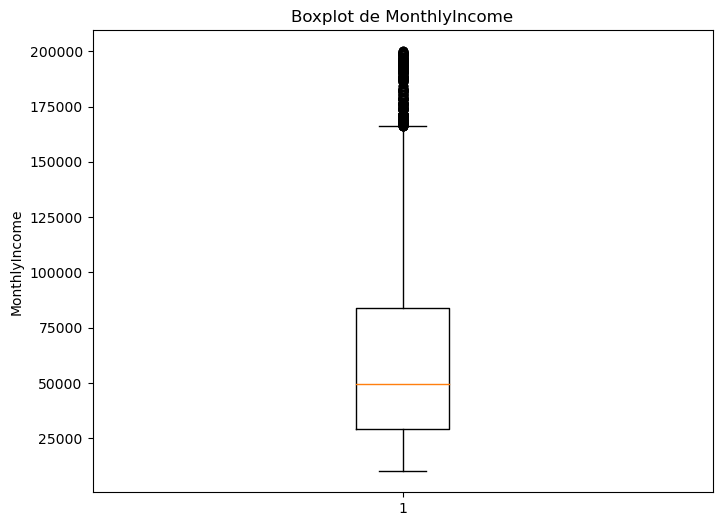

In [52]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el boxplot de MonthlyIncome
ax.boxplot(df['MonthlyIncome'])
ax.set_title('Boxplot de MonthlyIncome')
ax.set_ylabel('MonthlyIncome')

# Mostrar la figura
plt.show()

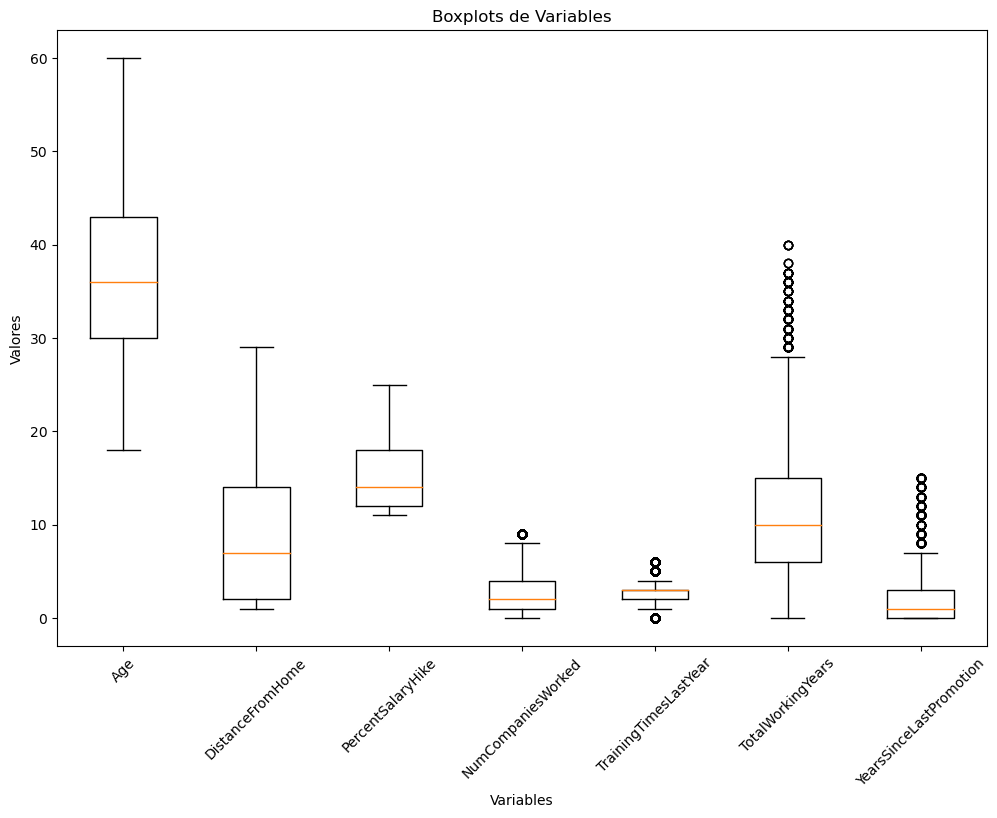

In [53]:

variables = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 
             'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkingYears', 
            'YearsSinceLastPromotion']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[variables].values, labels=variables)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4345 non-null   float64
 1   JobSatisfaction          4345 non-null   float64
 2   WorkLifeBalance          4345 non-null   float64
 3   Age                      4345 non-null   int64  
 4   BusinessTravel           4345 non-null   object 
 5   Department               4345 non-null   object 
 6   DistanceFromHome         4345 non-null   int64  
 7   Education                4345 non-null   int64  
 8   EducationField           4345 non-null   object 
 9   Gender                   4345 non-null   object 
 10  JobLevel                 4345 non-null   int64  
 11  JobRole                  4345 non-null   object 
 12  MaritalStatus            4345 non-null   object 
 13  MonthlyIncome            4345 non-null   int64  
 14  NumCompaniesWorked      

In [55]:
####### Para  
df['TotalWorkingYears'].value_counts()

10.0    607
6.0     365
8.0     304
9.0     284
5.0     258
7.0     241
1.0     224
4.0     187
12.0    143
3.0     126
15.0    117
16.0    109
13.0    108
11.0    104
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     79
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      32
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     20
36.0     18
34.0     14
37.0     12
35.0      9
40.0      5
38.0      3
Name: TotalWorkingYears, dtype: int64

In [56]:
df = df[df['TotalWorkingYears'] < 35.0]

In [57]:
df['TotalWorkingYears'].value_counts()

10.0    607
6.0     365
8.0     304
9.0     284
5.0     258
7.0     241
1.0     224
4.0     187
12.0    143
3.0     126
15.0    117
16.0    109
13.0    108
11.0    104
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     79
19.0     66
23.0     66
22.0     62
24.0     54
28.0     42
26.0     42
25.0     42
0.0      32
29.0     30
31.0     27
32.0     27
30.0     21
27.0     21
33.0     20
34.0     14
Name: TotalWorkingYears, dtype: int64

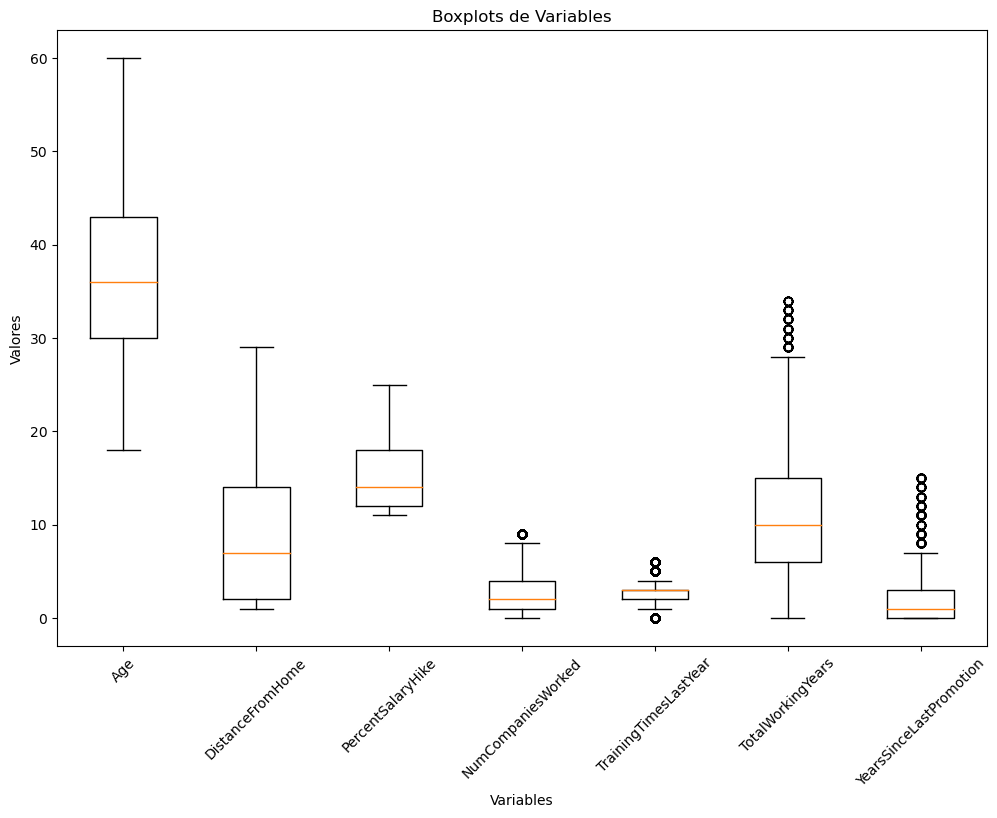

In [58]:
variables = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 
             'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkingYears', 
            'YearsSinceLastPromotion']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[variables].values, labels=variables)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

## **Tranformacion de variables**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4298 entries, 0 to 4344
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4298 non-null   float64
 1   JobSatisfaction          4298 non-null   float64
 2   WorkLifeBalance          4298 non-null   float64
 3   Age                      4298 non-null   int64  
 4   BusinessTravel           4298 non-null   object 
 5   Department               4298 non-null   object 
 6   DistanceFromHome         4298 non-null   int64  
 7   Education                4298 non-null   int64  
 8   EducationField           4298 non-null   object 
 9   Gender                   4298 non-null   object 
 10  JobLevel                 4298 non-null   int64  
 11  JobRole                  4298 non-null   object 
 12  MaritalStatus            4298 non-null   object 
 13  MonthlyIncome            4298 non-null   int64  
 14  NumCompaniesWorked      

In [60]:
# Convertir las variables float a tipo entero
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4298 entries, 0 to 4344
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EnvironmentSatisfaction  4298 non-null   int32 
 1   JobSatisfaction          4298 non-null   int32 
 2   WorkLifeBalance          4298 non-null   int32 
 3   Age                      4298 non-null   int64 
 4   BusinessTravel           4298 non-null   object
 5   Department               4298 non-null   object
 6   DistanceFromHome         4298 non-null   int64 
 7   Education                4298 non-null   int64 
 8   EducationField           4298 non-null   object
 9   Gender                   4298 non-null   object
 10  JobLevel                 4298 non-null   int64 
 11  JobRole                  4298 non-null   object
 12  MaritalStatus            4298 non-null   object
 13  MonthlyIncome            4298 non-null   int64 
 14  NumCompaniesWorked       4298 non-null  

In [62]:
df.to_csv(r'C:\Users\luisa\OneDrive\Desktop\Analitica lll RH\Bases\df_final.csv', index=False)